In [9]:
from sqlalchemy import create_engine
import psycopg2
import pandas as pd
import config

In [10]:
#engine = create_engine('postgresql://localhost:5432/Emp_db user=postgres password=Returningrr&95')
connection = psycopg2.connect(host="localhost", port = 5432, database="Emp_db", user="postgres", password= config.pwd_postgres)

In [11]:
#!pip install psycopg2

In [12]:
sqlcommand = "select * from employees"
df_employees = pd.read_sql(sqlcommand,connection) 

df_employees.head()

,emp_no,emp_title,birth_date,first_name,last_name,sex,hire_date
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18


In [13]:
sql_command = "select emp_no, sex, last_name from employees where sex= 'F' and last_name like 'B%'"
df_female_emp_lastname_B = pd.read_sql(sql_command, connection)

df_female_emp_lastname_B.head()

,emp_no,sex,last_name
0,57444,F,Babb
1,282238,F,Baumann
2,246449,F,Bultermann
3,413842,F,Bahr
4,246896,F,Baik


In [14]:
sqlcommand  = "select * from titles"
df_title = pd.read_sql(sqlcommand, connection)

df_title.head()

,title_id,title
0,s0001,Staff
1,s0002,Senior Staff
2,e0001,Assistant Engineer
3,e0002,Engineer
4,e0003,Senior Engineer


In [15]:
sqlcommand = " select * from  salaries"
df_salaries = pd.read_sql(sqlcommand, connection)

df_salaries.head()

,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228


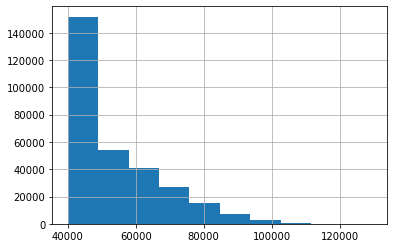

In [16]:
hist = df_salaries["salary"].hist(bins=10)



In [17]:
df_merge = pd.merge(df_employees,df_salaries, on ="emp_no")

df_merge .head()

,emp_no,emp_title,birth_date,first_name,last_name,sex,hire_date,salary
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28,40000
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07,53422
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21,48973
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26,40000
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18,40000


<AxesSubplot:xlabel='emp_title'>

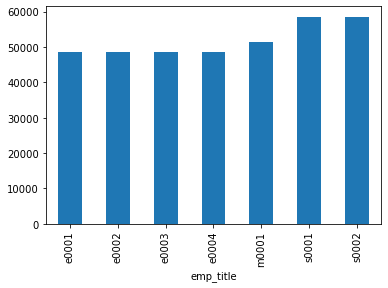

In [18]:
df_group = df_merge.groupby("emp_title")["salary"].mean()
df_group

df_group.plot(kind="bar")